In [3]:
import pandas as pd

data = pd.read_csv('car.csv', encoding = 'euc-kr')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      409 non-null    int64  
 1   회사명     409 non-null    object 
 2   년식      409 non-null    int64  
 3   종류      409 non-null    object 
 4   연비      408 non-null    float64
 5   마력      409 non-null    int64  
 6   토크      409 non-null    float64
 7   연료      409 non-null    object 
 8   LPG     409 non-null    int64  
 9   하이브리드   409 non-null    int64  
 10  배기량     409 non-null    int64  
 11  중량      408 non-null    float64
 12  변속기     409 non-null    object 
dtypes: float64(3), int64(6), object(4)
memory usage: 41.7+ KB


In [4]:
data.loc[data['중량'].isnull(),:]
#data.loc[data['연비'].isnull(),:]

,가격,회사명,년식,종류,연비,마력,토크,연료,LPG,하이브리드,배기량,중량,변속기
66,4802,현대,2013,대형,NaN,175,46.0,디젤,0,0,2497,NaN,자동


In [5]:
data.loc[66,'연비'] = 10.3
data.loc[66,'중량'] = 1906

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      409 non-null    int64  
 1   회사명     409 non-null    object 
 2   년식      409 non-null    int64  
 3   종류      409 non-null    object 
 4   연비      409 non-null    float64
 5   마력      409 non-null    int64  
 6   토크      409 non-null    float64
 7   연료      409 non-null    object 
 8   LPG     409 non-null    int64  
 9   하이브리드   409 non-null    int64  
 10  배기량     409 non-null    int64  
 11  중량      409 non-null    float64
 12  변속기     409 non-null    object 
dtypes: float64(3), int64(6), object(4)
memory usage: 41.7+ KB


In [7]:
#빈값채우기 - 대형이면서 디젤연료를 사용하는 차량의 평균 연비
car_comp = pd.DataFrame({'종류':data['종류'],'연료':data['연료'],'연비':data['연비']})
car_comp
car_comp.loc[(car_comp['종류'] == '대형') & (car_comp['연료'] == '디젤'),:].groupby(['종류','연료']).mean()


,,연비
종류,연료,
대형,디젤,10.294444


In [8]:
#빈값채우기 - 대형차량의 평균 중량
data.loc[data['종류'] == '대형']['중량'].mean()

1906.3589743589744

In [9]:
#중복확인
data.loc[data.duplicated(),:]


,가격,회사명,년식,종류,연비,마력,토크,연료,LPG,하이브리드,배기량,중량,변속기
67,1960,현대,2015,대형,9.6,175,46.0,디젤,0,0,2497,1990.0,자동
68,1960,현대,2015,대형,11.4,175,46.0,디젤,0,0,2497,1990.0,수동


In [10]:
non_dup = data.drop_duplicates()
non_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, 0 to 408
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      407 non-null    int64  
 1   회사명     407 non-null    object 
 2   년식      407 non-null    int64  
 3   종류      407 non-null    object 
 4   연비      407 non-null    float64
 5   마력      407 non-null    int64  
 6   토크      407 non-null    float64
 7   연료      407 non-null    object 
 8   LPG     407 non-null    int64  
 9   하이브리드   407 non-null    int64  
 10  배기량     407 non-null    int64  
 11  중량      407 non-null    float64
 12  변속기     407 non-null    object 
dtypes: float64(3), int64(6), object(4)
memory usage: 44.5+ KB


In [11]:
car_df = non_dup.copy()
car_df['변속기'].replace('자동', 0,inplace=True)
car_df['변속기'].replace('수동', 1,inplace=True)

In [12]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, 0 to 408
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      407 non-null    int64  
 1   회사명     407 non-null    object 
 2   년식      407 non-null    int64  
 3   종류      407 non-null    object 
 4   연비      407 non-null    float64
 5   마력      407 non-null    int64  
 6   토크      407 non-null    float64
 7   연료      407 non-null    object 
 8   LPG     407 non-null    int64  
 9   하이브리드   407 non-null    int64  
 10  배기량     407 non-null    int64  
 11  중량      407 non-null    float64
 12  변속기     407 non-null    int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 44.5+ KB


In [13]:
car_df.groupby('회사명')['가격'].describe()

,count,mean,std,min,25%,50%,75%,max
회사명,,,,,,,,
기아,144.0,1887.291667,1195.229111,714.0,1144.5,1487.0,2120.0,8620.0
대우,14.0,2027.928571,1407.177397,741.0,872.5,961.0,3497.0,4019.0
삼성,10.0,2586.000000,527.113734,1590.0,2272.5,2630.0,2842.5,3520.0
쉐보레,111.0,1725.666667,609.900668,829.0,1245.0,1711.0,2193.5,3238.0
쌍용,27.0,3944.148148,2528.743800,1635.0,2263.0,2818.0,5189.0,10687.0
현대,101.0,2536.376238,1858.800392,870.0,1560.0,2080.0,2870.0,14570.0


In [14]:
car_df['회사명'].replace('대우',0,inplace=True)
car_df['회사명'].replace('쉐보레',1,inplace=True)
car_df['회사명'].replace('삼성',2,inplace=True)
car_df['회사명'].replace('기아',3,inplace=True)
car_df['회사명'].replace('쌍용',4,inplace=True)
car_df['회사명'].replace('현대',5,inplace=True)

In [15]:
car_df['연료'].replace('LPG',0,inplace=True)
car_df['연료'].replace('디젤',1,inplace=True)
car_df['연료'].replace('가솔린',2,inplace=True)

In [16]:
car_df['종류'].replace('경형',0,inplace=True)
car_df['종류'].replace('소형',1,inplace=True)
car_df['종류'].replace('준중형',2,inplace=True)
car_df['종류'].replace('중형',3,inplace=True)
car_df['종류'].replace('대형',4,inplace=True)

In [17]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, 0 to 408
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      407 non-null    int64  
 1   회사명     407 non-null    int64  
 2   년식      407 non-null    int64  
 3   종류      407 non-null    int64  
 4   연비      407 non-null    float64
 5   마력      407 non-null    int64  
 6   토크      407 non-null    float64
 7   연료      407 non-null    int64  
 8   LPG     407 non-null    int64  
 9   하이브리드   407 non-null    int64  
 10  배기량     407 non-null    int64  
 11  중량      407 non-null    float64
 12  변속기     407 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 44.5 KB


In [18]:
car_df.columns

Index(['가격', '회사명', '년식', '종류', '연비', '마력', '토크', '연료', 'LPG', '하이브리드', '배기량',
       '중량', '변속기'],
      dtype='object')

In [19]:
car_df.loc[car_df['연료']==2,'LPG'].value_counts()

LPG
0    224
Name: count, dtype: int64

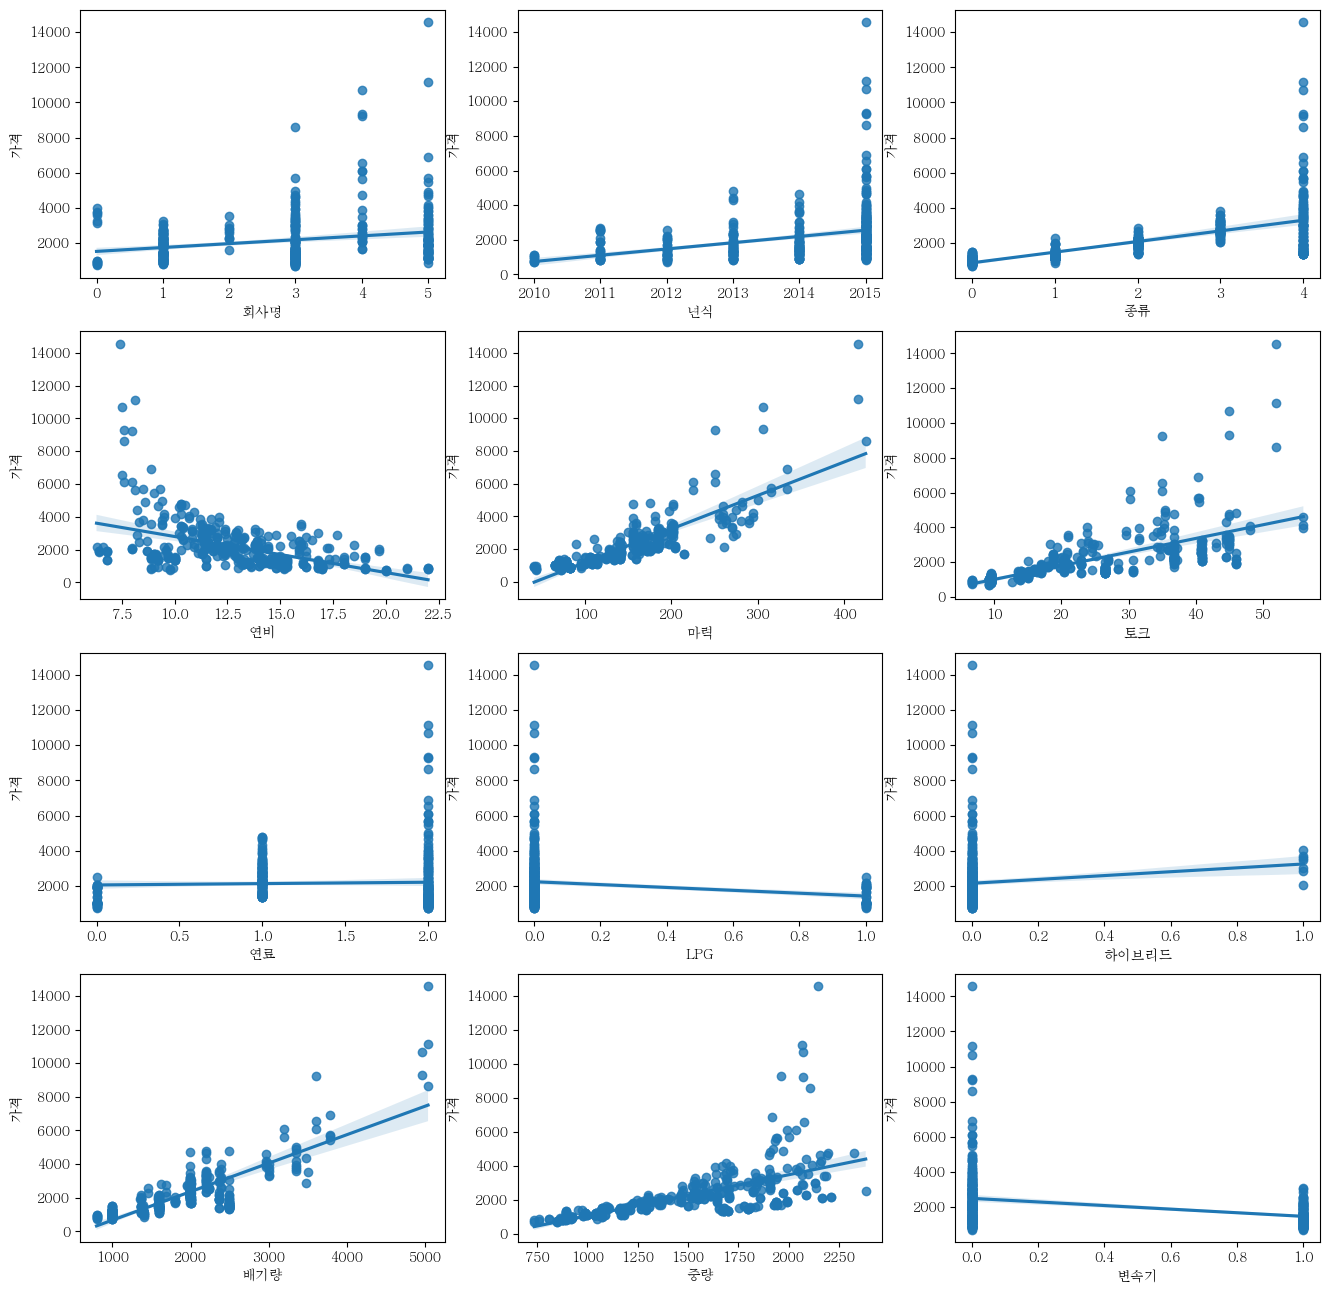

In [20]:
import matplotlib.pyplot as plt
import matplotlib                        
matplotlib.rcParams['font.family']='batang'
import seaborn as sns

f,ax = plt.subplots(nrows=4,ncols=3,figsize=(16,16))

x_features = list(car_df.columns)
x_features.remove('가격')
for i, features in enumerate(x_features):
    row=int(i/3)
    col=i%3
    sns.regplot(x=features, y='가격',data=car_df,ax = ax[row][col])


In [21]:
y = car_df['가격']
x = car_df.drop(['가격'],axis=1,inplace=False)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=0) #test_size - 데이터의 얼마만큼을 테스트값으로 남길지, random_state - 랜덤시드

#선형회귀 모델 생성
lr = LinearRegression()
#선형회귀 모델훈련 -> 완성
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
print('평가값',r2_score(y_test,y_pred))

평가값 0.8757024054495947


C:\Users\DongGyu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\DongGyu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\DongGyu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\DongGyu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

In [22]:
car_df.columns

Index(['가격', '회사명', '년식', '종류', '연비', '마력', '토크', '연료', 'LPG', '하이브리드', '배기량',
       '중량', '변속기'],
      dtype='object')

In [42]:
y=car_df['가격']
x=car_df.loc[:,['마력','배기량','중량','하이브리드','종류','년식','변속기','연비','토크','회사명']]
   
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=1) 

#선형회귀 모델 생성
lr = LinearRegression()
#선형회귀 모델훈련 -> 완성
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
print('평가값',r2_score(y_test,y_pred))

평가값 0.7696700858590466


C:\Users\DongGyu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\DongGyu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\DongGyu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\DongGyu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

In [43]:
car_info=[[191,2500,1655,0,3,2023,0,26.5,181,5]] #2023 싼타페기준
value=lr.predict(car_info)
print('예상가는:',value[0],'원')    #실제가격 약3714만원

예상가는: 3881.4502797937603 원


C:\Users\DongGyu\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
